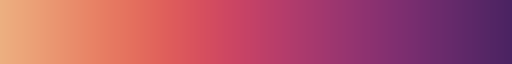

In [1]:
# import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme(style="whitegrid", palette="flare")
sns.color_palette("flare", as_cmap=True)

In [2]:
# age
# sex
# chest pain type (4 values)
# resting blood pressure
# serum cholestoral in mg/dl
# fasting blood sugar > 120 mg/dl
# resting electrocardiographic results (values 0,1,2)
# maximum heart rate achieved
# exercise induced angina
# oldpeak = ST depression induced by exercise relative to rest
# the slope of the peak exercise ST segment
# number of major vessels (0-3) colored by flourosopy
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [2]:
df = pd.read_csv(r'C:\Users\kamila.nita\OneDrive - Centrum Łukasiewicz\Dokumenty\GitHub\medical\heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
correlations = df.corr()

<Axes: >

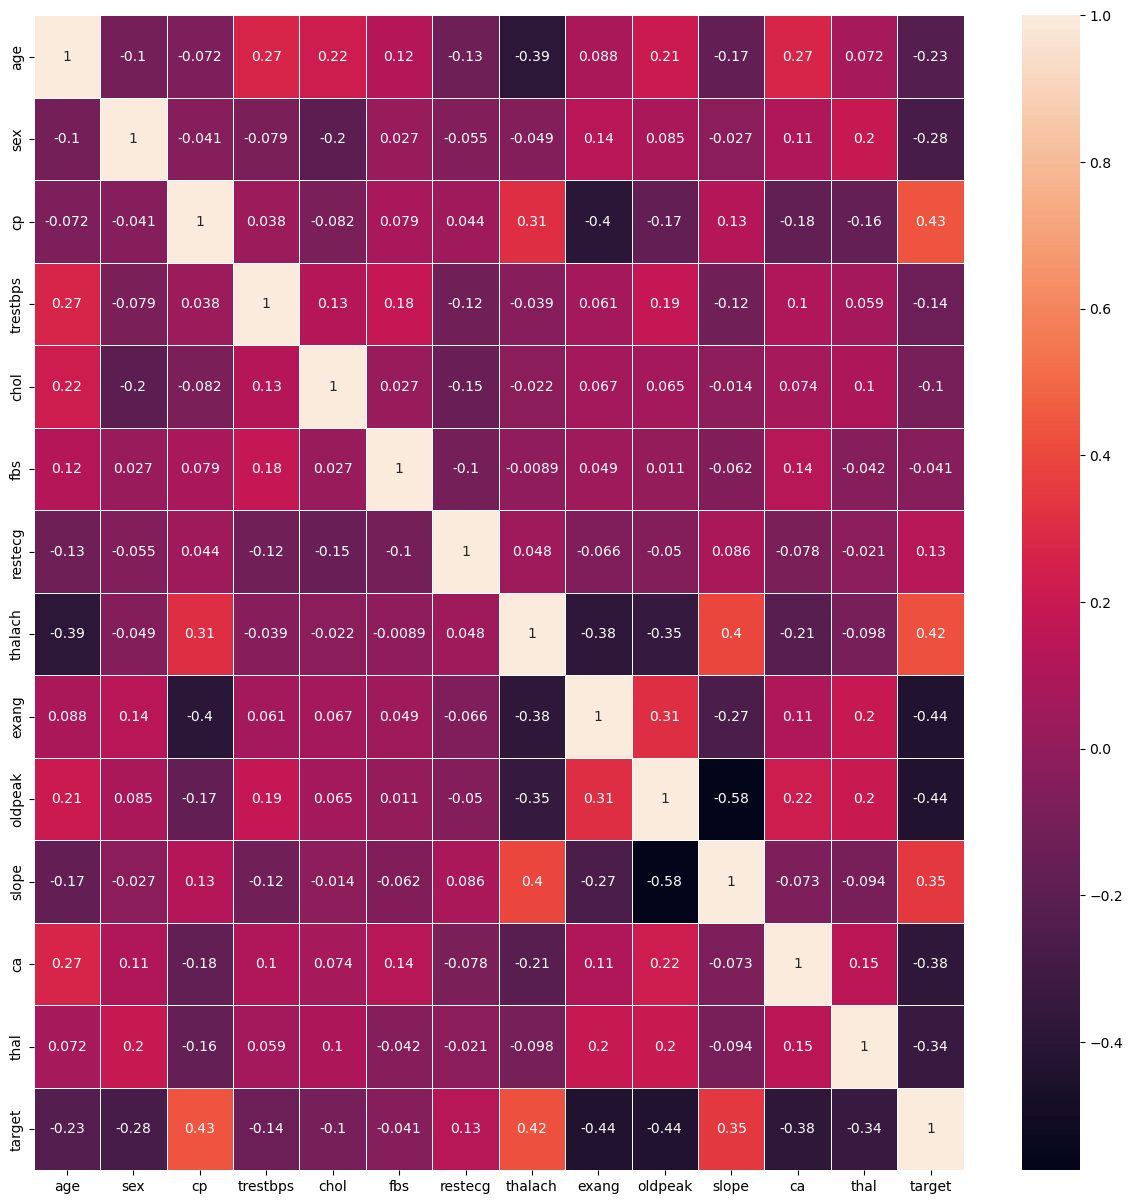

In [9]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations, annot=True, linewidths=.5, ax=ax)

<Axes: >

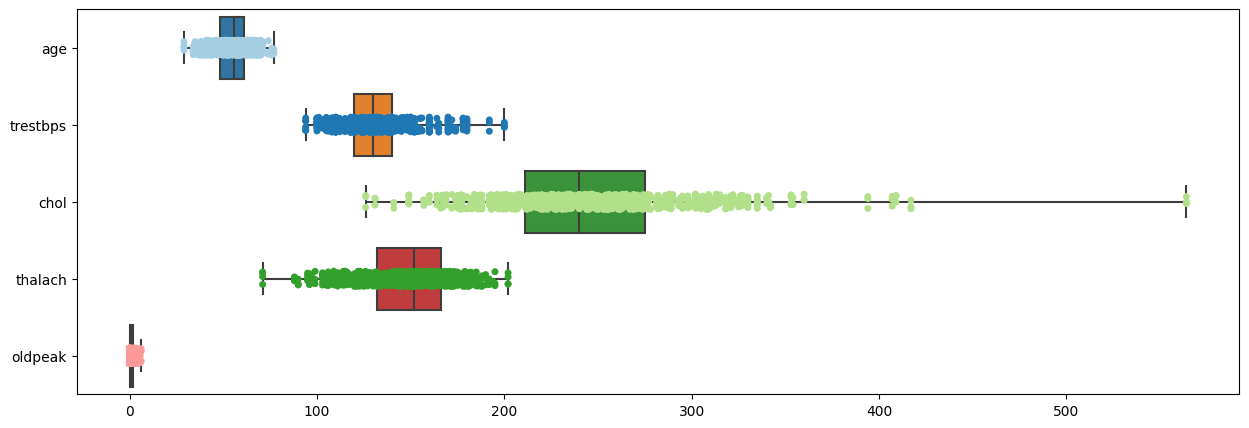

In [19]:
f, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df[columns], orient='h', whis=[0, 100])
sns.stripplot(data=df[columns], orient='h', palette='Paired')

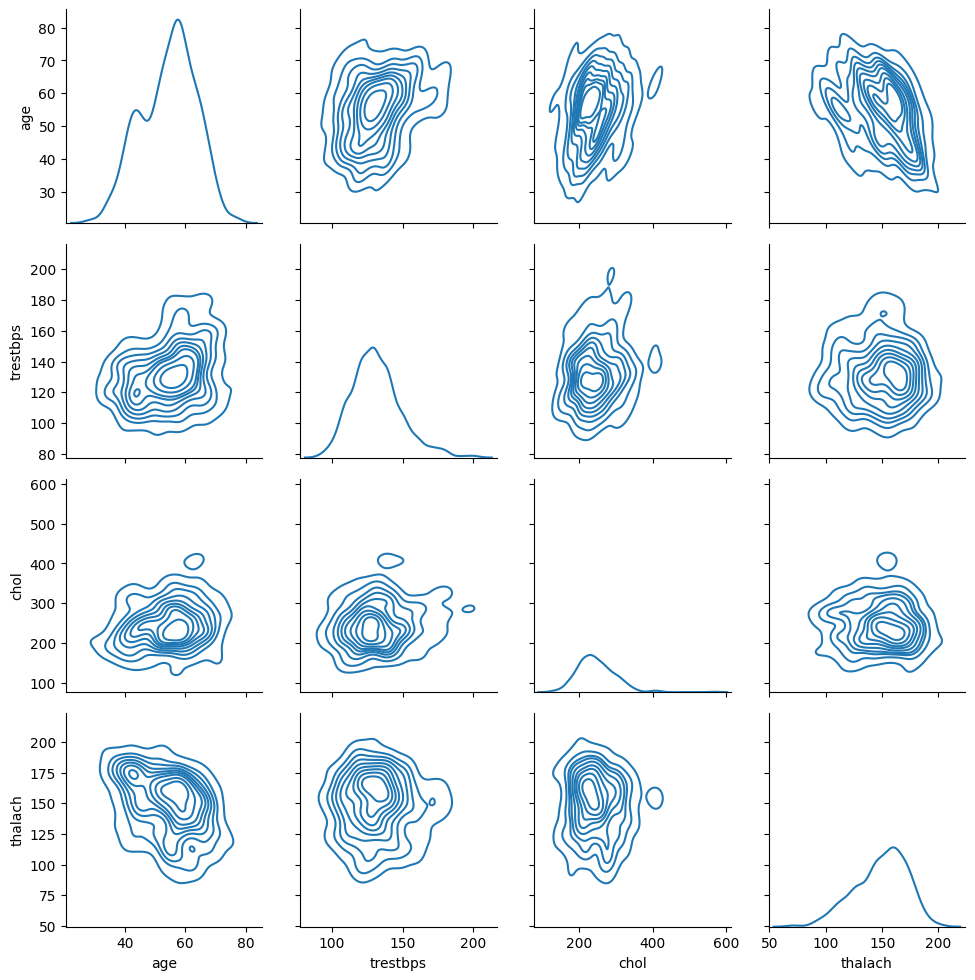

In [24]:
g = sns.PairGrid(df[['age','trestbps','chol','thalach']])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=10)

c:\Users\kamila.nita\.conda\envs\medical2\lib\site-packages\seaborn\axisgrid.py:181: UserWarning: The label '_nolegend_' of <matplotlib.patches.Patch object at 0x0000021088846CB0> starts with '_'. It is thus excluded from the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


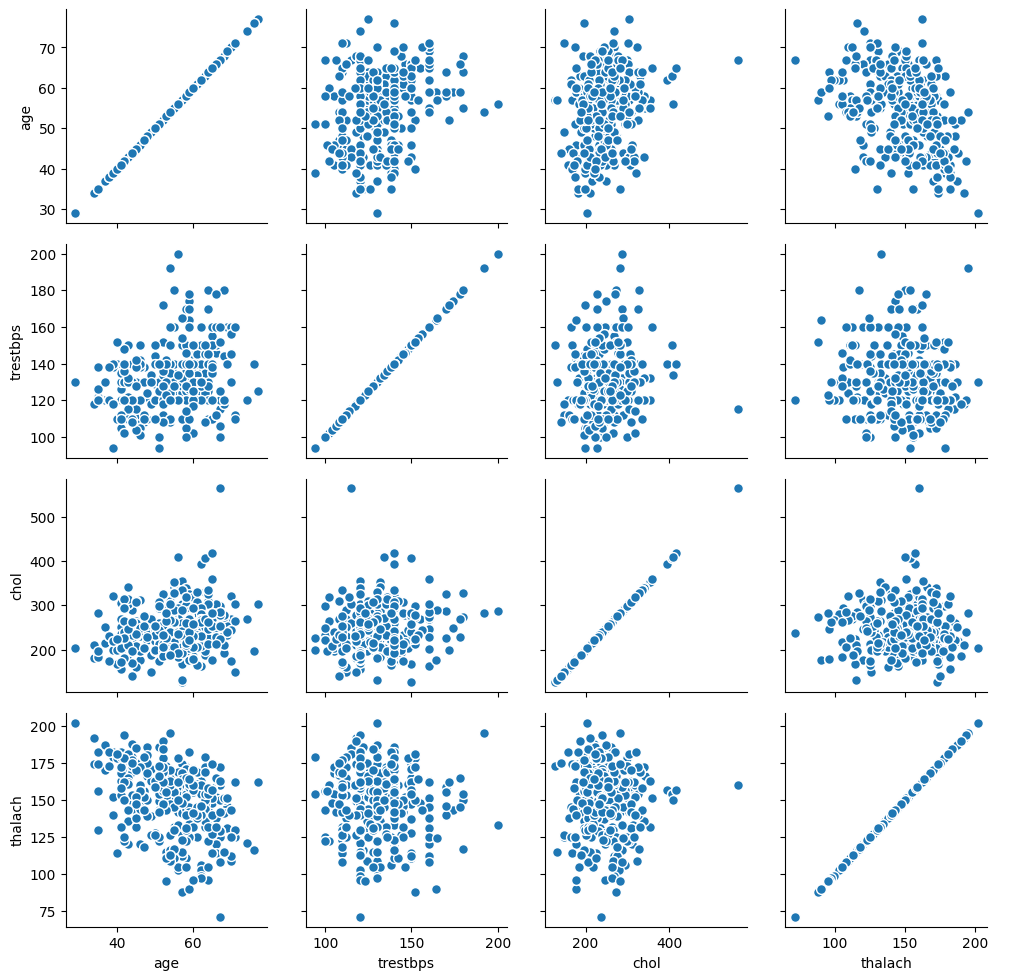

In [25]:
g = sns.PairGrid(df[['age','trestbps','chol','thalach']],palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend()

c:\Users\kamila.nita\.conda\envs\medical2\lib\site-packages\seaborn\axisgrid.py:181: UserWarning: The label '_nolegend_' of <matplotlib.patches.Patch object at 0x0000021089679CC0> starts with '_'. It is thus excluded from the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


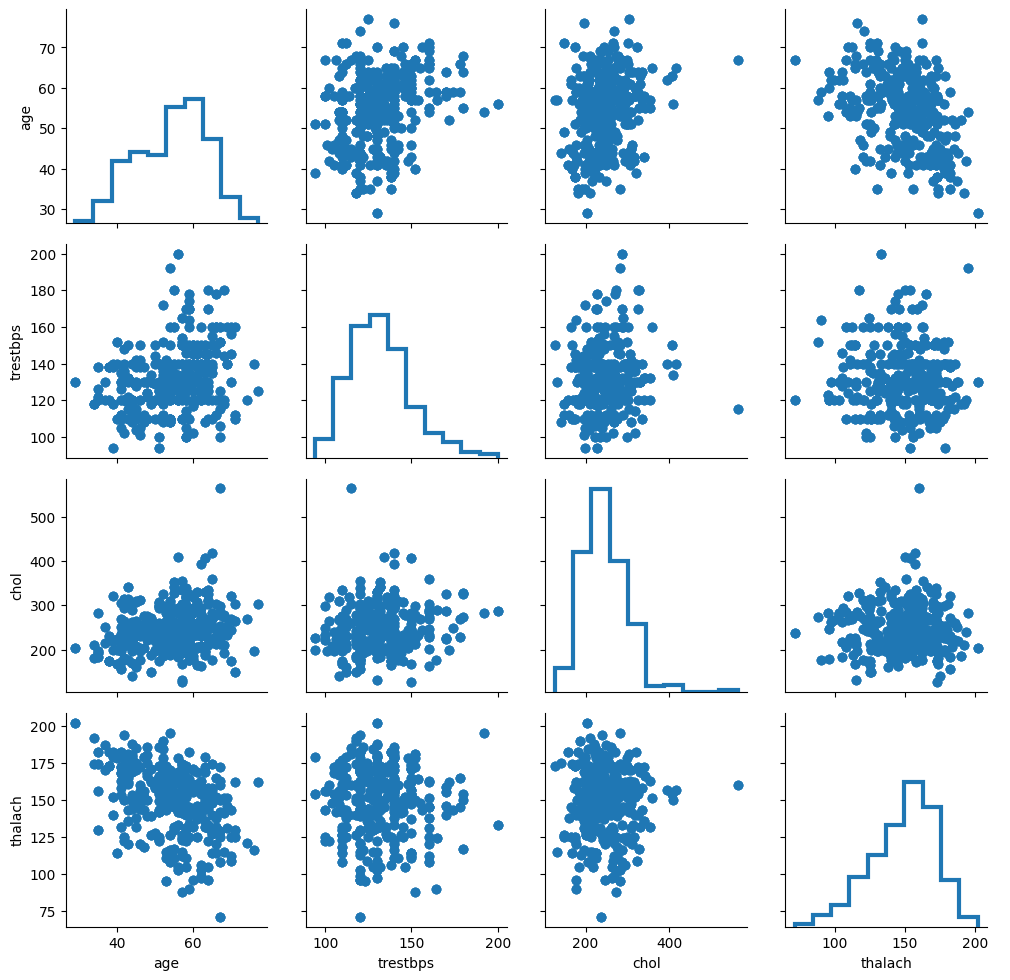

In [26]:
g = sns.PairGrid(df[['age','trestbps','chol','thalach']])
g = g.map_diag(plt.hist, histtype='step', linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()